In [24]:
import numpy as np 
import active_learning
import xlrd

In [25]:
data = ("Concrete_Data.xls") 
  
wb = xlrd.open_workbook(data) 
sheet = wb.sheet_by_index(0) 
  
# For row 0 and column 0 
sheet.cell_value(0, 0) 
  
for i in range(sheet.ncols): 
    print(sheet.cell_value(0, i)) 

Cement (component 1)(kg in a m^3 mixture)
Blast Furnace Slag (component 2)(kg in a m^3 mixture)
Fly Ash (component 3)(kg in a m^3 mixture)
Water  (component 4)(kg in a m^3 mixture)
Superplasticizer (component 5)(kg in a m^3 mixture)
Coarse Aggregate  (component 6)(kg in a m^3 mixture)
Fine Aggregate (component 7)(kg in a m^3 mixture)
Age (day)
Concrete compressive strength(MPa, megapascals) 


In [26]:
import matplotlib.pyplot as plt
from mpl_toolkits import mplot3d
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, WhiteKernel
from active_learning.problem import ActiveLearningProblem
from active_learning.query_strats.random_sampling import RandomQuery
from active_learning.query_strats.regression import (GreedySelection, MCALSelection, UncertaintySampling)
np.random.seed(0)

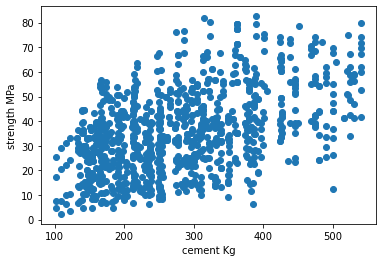

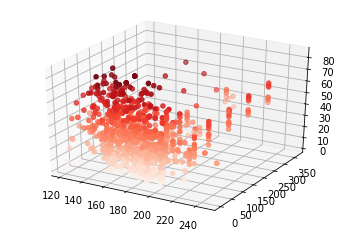

In [27]:
#create more easily accessible dictionaries for data parsing
features = {}
zfeatures = {}
cement = []
for i in range(1, sheet.nrows): 
    cement.append(sheet.cell_value(i, 0)) 
features['cement'] = cement 
zfeatures['cement'] = cement 
slag = []
for i in range(1, sheet.nrows): 
    slag.append(sheet.cell_value(i, 1)) 
features['slag'] = slag
zfeatures['slag'] = slag
ash = []
for i in range(1, sheet.nrows): 
    ash.append(sheet.cell_value(i, 2)) 
features['ash'] = ash
zfeatures['ash'] = ash
water = []
for i in range(1, sheet.nrows): 
    water.append(sheet.cell_value(i, 3)) 
features['water'] = water
zfeatures['water'] = water
plastic = []
for i in range(1, sheet.nrows): 
    plastic.append(sheet.cell_value(i, 4)) 
features['plastic'] = plastic
zfeatures['plastic'] = plastic
coarse = []
for i in range(1, sheet.nrows): 
    coarse.append(sheet.cell_value(i, 5)) 
features['coarse'] = coarse
zfeatures['coarse'] = coarse
fine = []
for i in range(1, sheet.nrows): 
    fine.append(sheet.cell_value(i, 6)) 
features['fine'] = fine
zfeatures['fine'] = fine
age = []
for i in range(1, sheet.nrows): 
    age.append(sheet.cell_value(i, 7)) 
features['age'] = age
zfeatures['age'] = age
strength = []
for i in range(1, sheet.nrows): 
    strength.append(sheet.cell_value(i, 8)) 
features['strength'] = strength
zfeatures['strength'] = strength

fig, ax = plt.subplots()
ax.scatter(cement, strength)
ax.set_xlabel('cement Kg')
ax.set_ylabel('strength MPa')

fig1, ax1 = plt.subplots()
ax1.scatter(water, strength)
ax1.set_xlabel('Water Kg')
ax1.set_ylabel('strength MPa')

ax = plt.axes(projection='3d')
ax.scatter3D(water, age, strength, c=strength, cmap='Reds')


In [28]:
'''
#Normalize the scores by zscore
import statistics

for x in features:
    mean = statistics.mean(features[x])
    sd = statistics.stdev(features[x])
    count = 0
    for i in features[x]:
        z = (i - mean)/ sd
        zfeatures[x][count] = z
        count += 1

ax = plt.axes(projection='3d')
ax.scatter3D(zfeatures['water'], zfeatures['age'], zfeatures['strength'], c=zfeatures['strength'], cmap='Reds')
'''

"\n#Normalize the scores by zscore\nimport statistics\n\nfor x in features:\n    mean = statistics.mean(features[x])\n    sd = statistics.stdev(features[x])\n    count = 0\n    for i in features[x]:\n        z = (i - mean)/ sd\n        zfeatures[x][count] = z\n        count += 1\n\nax = plt.axes(projection='3d')\nax.scatter3D(zfeatures['water'], zfeatures['age'], zfeatures['strength'], c=zfeatures['strength'], cmap='Reds')\n"

In [29]:
kernel = 1.0 * RBF(length_scale=100.0, length_scale_bounds=(1e-2, 1e3)) \
    + WhiteKernel(noise_level=1, noise_level_bounds=(1e-10, 1e+1))
regressor = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)


In [30]:
'''
#Take 3 highest correlated features
points1 = []
trainingfeatures = []
testfeatures = []
for x in range(sheet.nrows-1):
    if x < 631:
        holder = []
        holder.append(zfeatures['age'][x])
        holder.append(zfeatures['plastic'][x])
        holder.append(zfeatures['cement'][x])
        testfeatures.append(holder)
        points1.append(holder)
    else:
        holder1 =[]
        holder1.append(zfeatures['age'][x])
        holder1.append(zfeatures['plastic'][x])
        holder1.append(zfeatures['cement'][x])
        trainingfeatures.append(holder1)
        points1.append(holder1)
        
for x in range(len(zfeatures['strength'])):
    zfeatures['strength'][x] = int(zfeatures['strength'][x])
trainingstrength = []
for x in range(631, len(zfeatures['strength'])):
    trainingstrength.append(zfeatures['strength'][x]) 
print(len(trainingfeatures))
print(len(trainingstrength))
'''
#Take 3 highest correlated features
points1 = []
trainingfeatures = []
testfeatures = []
for x in range(sheet.nrows-1):
    if x < 400:
        holder = []
        holder.append(zfeatures['age'][x])
        holder.append(zfeatures['plastic'][x])
        holder.append(zfeatures['cement'][x])
        testfeatures.append(holder)
        points1.append(holder)
    elif x < 799:
        holder1 =[]
        holder1.append(zfeatures['age'][x])
        holder1.append(zfeatures['plastic'][x])
        holder1.append(zfeatures['cement'][x])
        trainingfeatures.append(holder1)
        points1.append(holder1) 
    else:
        holder = []
        holder.append(zfeatures['age'][x])
        holder.append(zfeatures['plastic'][x])
        holder.append(zfeatures['cement'][x])
        testfeatures.append(holder)
        points1.append(holder)
        
        
for x in range(len(zfeatures['strength'])):
    zfeatures['strength'][x] = int(zfeatures['strength'][x])
trainingstrength = []
for x in range(400,799):
    trainingstrength.append(zfeatures['strength'][x]) 
print(len(trainingfeatures))
print(len(trainingstrength))


399
399


In [31]:
regressor.fit(trainingfeatures, trainingstrength)

GaussianProcessRegressor(alpha=0.0, copy_X_train=True,
                         kernel=1**2 * RBF(length_scale=100) + WhiteKernel(noise_level=1),
                         n_restarts_optimizer=0, normalize_y=False,
                         optimizer='fmin_l_bfgs_b', random_state=None)

In [32]:
#define problem
problem = ActiveLearningProblem(points= np.array(points1),
    labeled_ixs = [x for x in range(400,799)],
    labels = np.array(trainingstrength))
print(len(range(631, len(zfeatures['strength']))))
print(len(points1))

399
1030


In [33]:
num_to_select = 20
random_ixs = RandomQuery().select_points(problem, num_to_select)
print(random_ixs)

[969 277 124 994 334 873 155 162 138 169 916 287 934 211 117 394 395 186
 990 399]


In [34]:
greedy_ixs = GreedySelection(model=regressor).select_points(problem, num_to_select)
print(greedy_ixs)

[54 81 57  4 34 22  2 23 20 12 65 41 60 26 66 25 35 61 56 63]


In [35]:
mcal_ixs = MCALSelection().select_points(problem, num_to_select)
print(mcal_ixs)

[ 875  874  881  901 1028  900  907  842  851  894  946  984 1008  910
  914  973  977  888  970  117]


In [36]:
uncertainty_ixs = UncertaintySampling(model=regressor).select_points(problem, num_to_select)
print(uncertainty_ixs)

[171  32   4 168  65  61  20  60  56  35  23  41  12  25  26  34  51  66
   2  63]


In [70]:
def copy_features(trainingfeatures):
    copy = []
    for x in trainingfeatures:
        copy.append(x)
    if trainingfeatures == copy:
        return copy
    else: return None

problem = ActiveLearningProblem(points= np.array(points1),
    labeled_ixs = [x for x in range(400,799)],
    labels = np.array(trainingstrength))

num_to_select = 20
iterations = 20

trainingfeatures1 = copy_features(trainingfeatures)
trainingstrength1 = copy_features(trainingstrength)
maxlist1 = []
guess1 = []
x1 = 0
lblxs = [i for i in range(400,799)]
while x1 < iterations: 
    random_ixs = RandomQuery().select_points(problem, num_to_select)
    for x in range(len(random_ixs)):
        holder =[]
        holder.append(zfeatures['age'][random_ixs[x]])
        holder.append(zfeatures['plastic'][random_ixs[x]])
        holder.append(zfeatures['cement'][random_ixs[x]])
        trainingfeatures1.append(holder1)
        trainingstrength1.append(zfeatures['strength'][random_ixs[x]])
        guess1.append(zfeatures['strength'][random_ixs[x]])
        maxlist1.append(max(trainingstrength1))
        lblxs.append(random_ixs[x])
        problem = ActiveLearningProblem(points= np.array(points1), labeled_ixs = lblxs, labels = np.array(trainingstrength1))
        #regressor.fit(trainingfeatures1, trainingstrength1)
    x1 += 1
print(x)
print(maxlist1)

19
[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 77, 77, 77, 77, 77, 77, 77, 77, 77, 77, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 81, 

In [71]:
from active_learning.objective import ObjectiveFunction, Maximize

regressor = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)

regressor.fit(trainingfeatures, trainingstrength)

problem = ActiveLearningProblem(points= np.array(points1),
    labeled_ixs = [x for x in range(400,799)],
    labels = np.array(trainingstrength), objective_fun = Maximize())

num_to_select = 20
iterations = 20

trainingfeatures2 = copy_features(trainingfeatures)
trainingstrength2 = copy_features(trainingstrength)
maxlist2 = []
guess2 = []
x1 = 0
lblxs = [x for x in range(400,799)]
while x1 < iterations: 
    greedy_ixs = GreedySelection(model=regressor).select_points(problem, num_to_select)
    for x in range(len(greedy_ixs)):
        holder =[]
        holder.append(zfeatures['age'][greedy_ixs[x]])
        holder.append(zfeatures['plastic'][greedy_ixs[x]])
        holder.append(zfeatures['cement'][greedy_ixs[x]])
        trainingfeatures2.append(holder)
        trainingstrength2.append(zfeatures['strength'][greedy_ixs[x]])
        guess2.append(zfeatures['strength'][greedy_ixs[x]])
        maxlist2.append(max(trainingstrength2))
        lblxs.append(greedy_ixs[x])
        problem = ActiveLearningProblem(points= np.array(points1), labeled_ixs = lblxs, labels = np.array(trainingstrength2), objective_fun = Maximize())
    regressor.fit(trainingfeatures2, trainingstrength2)
    x1 += 1
print(maxlist2)

[76, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 79, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80, 80,

In [72]:
problem = ActiveLearningProblem(points= np.array(points1),
    labeled_ixs = [x for x in range(400,799)],
    labels = np.array(trainingstrength))

num_to_select = 7
iterations = 20

trainingfeatures3 = copy_features(trainingfeatures)
trainingstrength3 = copy_features(trainingstrength)
maxlist3 = []
guess3 = []
lblxs = [x for x in range(400,799)]
x1 = 0
while x1 < iterations: 
    mcal_ixs = MCALSelection().select_points(problem, num_to_select)
    for x in range(len(mcal_ixs)):
        trainingstrength3.append(zfeatures['strength'][mcal_ixs[x]])
        maxlist3.append(max(trainingstrength3))
        guess3.append(zfeatures['strength'][mcal_ixs[x]])
        lblxs.append(mcal_ixs[0])
        problem = ActiveLearningProblem(points= np.array(points1), labeled_ixs = lblxs, labels = np.array(trainingstrength3))
    x1 += 1
print(maxlist3)

[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76]


In [73]:
regressor = GaussianProcessRegressor(kernel=kernel,
                              alpha=0.0)

regressor.fit(trainingfeatures, trainingstrength)

problem = ActiveLearningProblem(points= np.array(points1),
    labeled_ixs = [x for x in range(400,799)],
    labels = np.array(trainingstrength), objective_fun = Maximize())

num_to_select = 20
iterations = 20

trainingfeatures2 = copy_features(trainingfeatures)
trainingstrength2 = copy_features(trainingstrength)
maxlist4 = []
guess4 = []
lblxs = [x for x in range(400,799)]
x1 = 0
while x1 < iterations: 
    uncertainty_ixs = UncertaintySampling(model=regressor).select_points(problem, num_to_select)
    for x in range(len(uncertainty_ixs)):
        holder =[]
        holder.append(zfeatures['age'][uncertainty_ixs[x]])
        holder.append(zfeatures['plastic'][uncertainty_ixs[x]])
        holder.append(zfeatures['cement'][uncertainty_ixs[x]])
        trainingfeatures2.append(holder)
        trainingstrength2.append(zfeatures['strength'][uncertainty_ixs[x]])
        #print(zfeatures['strength'][uncertainty_ixs[0]])
        guess4.append(zfeatures['strength'][uncertainty_ixs[x]])
        maxlist4.append(max(trainingstrength2))
        lblxs.append(uncertainty_ixs[x])
        problem = ActiveLearningProblem(points= np.array(points1), labeled_ixs = lblxs, labels = np.array(trainingstrength2), objective_fun = Maximize())
    regressor.fit(trainingfeatures2, trainingstrength2)
    x1 += 1
print(maxlist4)

[76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 76, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82, 82,

<function matplotlib.pyplot.show(*args, **kw)>

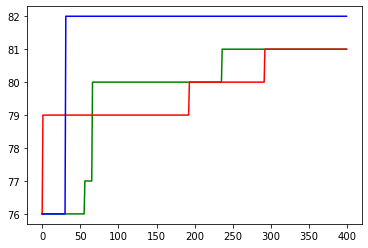

In [74]:
plt.plot(maxlist1, 'g', maxlist2, 'r', maxlist4, 'b')
#print(maxlist2)
#plt.plot(maxlist1, maxlist2, maxlist3, maxlist4)
plt.show

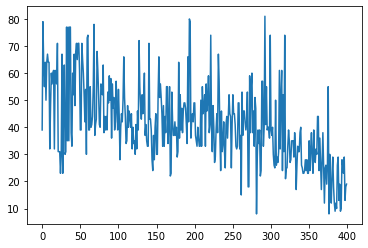

In [78]:
#plt.plot(guess1, 'g', guess2, 'r', guess4, 'b')
plt.plot(guess2)

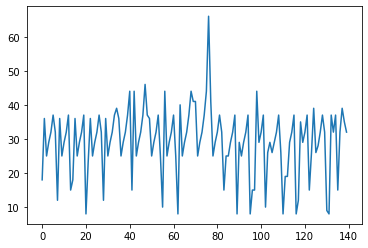

In [79]:
plt.plot(guess3)

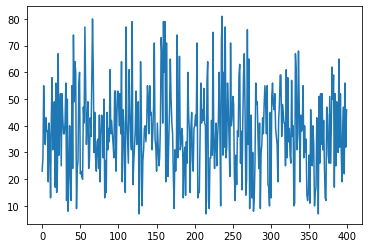

In [82]:
plt.plot(guess1)

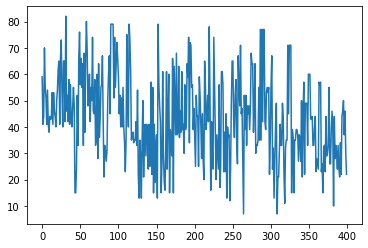

In [81]:
plt.plot(guess4)